## Importing Libraries and Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [ ]:
df.head()

## Graphs

### Distribution

In [ ]:
# Helps check skew/outliers

for col in df.columns[:-1]:
    plt.figure()
    sns.histplot(df[col], kde=True) # kde adds the curve estimating probability density
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### Data Scatter

In [ ]:
# Understand data scatter between train and test set

for feature in df.columns[:-1]:
    X = df[[feature]]
    y = df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    plt.figure()
    plt.scatter(X_train, y_train, label='Train', alpha=0.6) # alpha is transparency
    plt.scatter(X_test, y_test, label='Test', alpha=0.6, color='orange')
    plt.title(f'{feature} vs target - Train vs Test (Visualize split balance)')
    plt.xlabel(feature)
    plt.ylabel('target')
    plt.legend()
    plt.tight_layout()
    plt.show()

### Prediction Line

In [ ]:
# Prediction line to see performance

from sklearn.linear_model import LinearRegression

for feature in df.columns[:-1]:
    X = df[[feature]]
    y = df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)

    x_range = np.linspace(X[feature].min(), X[feature].max(), 100).reshape(-1, 1)
    y_pred_line = model.predict(x_range)

    plt.figure()
    plt.scatter(X_train, y_train, label='Train', alpha=0.6)
    plt.scatter(X_test, y_test, label='Test', alpha=0.6, color='orange')
    plt.plot(x_range, y_pred_line, label='Prediction Line', color='red')
    plt.title(f'Regression Line Over Data ({feature})')
    plt.xlabel(feature)
    plt.ylabel('target')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [15]:
pip install shap

   ---------------------------------------- 0.0/544.9 kB ? eta -:--:--
   --------------------------------------- 544.9/544.9 kB 18.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 51.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   --------------- ------------------------ 10.7/28.1 MB 51.7 MB/s eta 0:00:01
   -------------------------------- ------- 22.5/28.1 MB 54.9 MB/s eta 0:00:01
   ---------------------------------------- 28.1/28.1 MB 50.9 MB/s eta 0:00:00

   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   -------

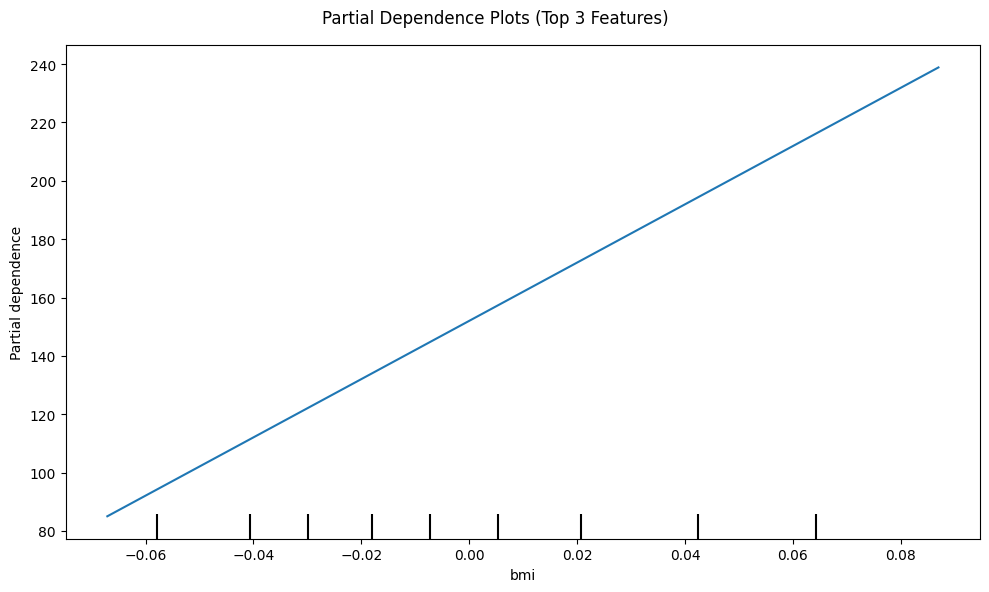

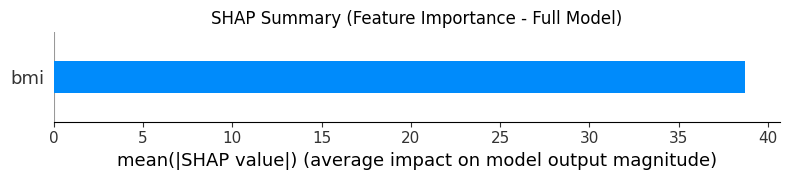

In [16]:
from sklearn.inspection import PartialDependenceDisplay
import shap

coefs = np.abs(model.coef_)
top_features = X.columns[np.argsort(coefs)[-3:]]

fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(model, X, features=top_features, ax=ax)
plt.suptitle("Partial Dependence Plots (Top 3 Features)")
plt.tight_layout()
plt.show()

# 4. SHAP summary plot
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.title("SHAP Summary (Feature Importance - Full Model)")
plt.tight_layout()
plt.show()

### Feature Vs. Target Relationship

In [ ]:
# Understanding feature to target relationships for all

for feature in df.columns[:-1]:
    plt.figure()
    sns.scatterplot(data=df, x=feature, y='target')
    plt.title(f'{feature} vs target (Relationship visualization)')
    plt.tight_layout()
    plt.show()

### Boxplot of all numeric features

In [ ]:
# Finding outliers

plt.figure(figsize=(10, 4))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplot of All Features (Check for outliers)')
plt.tight_layout()
plt.show()

Phik Correlation Heatmap

In [ ]:
pip install phik

# Understanding relationship further

phik_corr = df.phik_matrix(interval_cols=df.columns[:-1])
plt.figure(figsize=(10, 8))
sns.heatmap(phik_corr, annot=True, cmap='coolwarm')
plt.title('Phik Correlation Heatmap (Supports categorical + nonlinear)')
plt.tight_layout()
plt.show()

### Pairplot of selected features

In [ ]:
# Understand spot linear or nonlinear patterns between variables

sample_features = ['bmi', 'bp', 's5', 'target']
sns.pairplot(df[sample_features])
plt.suptitle('Pairplot of Selected Features (Interaction check)', y=1.02)
plt.tight_layout()
plt.show()

### Residual plot (only for 'bmi' model example)

In [ ]:
# Check model assumptions. Good scatter means good fit

X = df[['bmi']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
residuals = y_test - y_pred

plt.figure()
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot (Random scatter = good fit)')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()